In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ML_2

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


dataset = pd.read_csv('/content/drive/MyDrive/Dataset/data1.csv')
x = dataset[['Mothers occupation', 'Fathers occupation', 'Debtor']]
y = dataset[['Target']]


In [3]:
dataset.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mothers qualification,Fathers qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
dataset.dropna(inplace=True)

In [5]:
target_counts = dataset['Target'].value_counts()
print("Enrolled: ", target_counts['Enrolled'])
print("Graduate: ", target_counts['Graduate'])
print("Dropped Out: ", target_counts['Dropout'])

Enrolled:  794
Graduate:  2209
Dropped Out:  1421


In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
class1 = LogisticRegression(random_state=42)
class2 = RandomForestClassifier(n_estimators=100, random_state=42)

In [8]:
ensemble_classifier = VotingClassifier(estimators=[
    ('LogReg', class1),
    ('RanFor', class2)
], voting='soft')

In [9]:
ensemble_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier(estimators=[('LogReg', LogisticRegression(random_state=42)),
                             ('RanFor',
                              RandomForestClassifier(random_state=42))],
                 voting='soft')

In [10]:
y_pred = ensemble_classifier.predict(X_test)

In [11]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report')
print(report)

Accuracy: 0.5435028248587571
Classification Report
              precision    recall  f1-score   support

     Dropout       0.68      0.30      0.41       316
    Enrolled       0.43      0.02      0.04       151
    Graduate       0.52      0.92      0.66       418

    accuracy                           0.54       885
   macro avg       0.54      0.41      0.37       885
weighted avg       0.56      0.54      0.47       885



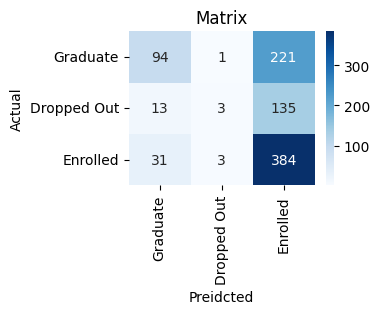

In [12]:
ConMat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 2))
sns.heatmap(ConMat, annot=True, fmt='d', cmap='Blues', xticklabels=['Graduate', 'Dropped Out', 'Enrolled'], yticklabels=['Graduate', 'Dropped Out', 'Enrolled'])
plt.xlabel('Preidcted')
plt.ylabel('Actual')
plt.title('Matrix')
plt.show()